In this data, we have set of variables with churn column .  we have to find those customers who are going to churn.

**Importing libraries:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**importing dataset:**

In [ ]:
df = pd.read_csv("/content/Churn_MV.csv")

**data analysis, visualization and preprocessing:**

In [ ]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,110.0,45.07,45.07,99.0,16.78,91.0,11.01,3.0,2.7,KS,415.0,382-4657
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,123.0,27.47,27.47,103.0,16.62,103.0,11.45,3.0,3.7,OH,415.0,371-7191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
6661,28.0,0.0,180.8,288.8,191.9,14.1,2.0,0.0,0.0,0.0,109.0,30.74,30.74,58.0,24.55,91.0,8.64,6.0,3.81,RI,510.0,328-8230
6662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6663,184.0,0.0,213.8,159.6,139.2,5.0,2.0,0.0,1.0,0.0,105.0,36.35,36.35,84.0,13.57,137.0,6.26,10.0,1.35,CT,510.0,364-6381
6664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,74.0,25.0,234.4,265.9,241.4,13.7,0.0,0.0,0.0,1.0,113.0,39.85,39.85,82.0,22.60,77.0,10.86,4.0,3.70,TN,415.0,400-4344


In [ ]:
df.shape

(6666, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account Length    3333 non-null   float64
 1   VMail Message     3333 non-null   float64
 2   Day Mins          3333 non-null   float64
 3   Eve Mins          3333 non-null   float64
 4   Night Mins        3333 non-null   float64
 5   Intl Mins         3333 non-null   float64
 6   CustServ Calls    3333 non-null   float64
 7   Churn             3333 non-null   float64
 8   Intl Plan         3333 non-null   float64
 9   VMail Plan        3333 non-null   float64
 10  Day Calls         3333 non-null   float64
 11  Day Charge        3333 non-null   float64
 12  Daily Charges MV  3283 non-null   float64
 13  Eve Calls         3333 non-null   float64
 14  Eve Charge        3333 non-null   float64
 15  Night Calls       3333 non-null   float64
 16  Night Charge      3333 non-null   float64


as we observe, there are some rows having ony 'NaN' for every feature 

first let's remove those kind of rows:

In [ ]:
df.dropna(axis=0,how='all',inplace=True)

In [ ]:
df.shape

(3333, 22)

as we observere number of rows droped from 6666 to 3333 , which means half of the rows in the dataset are useless

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 6665
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account Length    3333 non-null   float64
 1   VMail Message     3333 non-null   float64
 2   Day Mins          3333 non-null   float64
 3   Eve Mins          3333 non-null   float64
 4   Night Mins        3333 non-null   float64
 5   Intl Mins         3333 non-null   float64
 6   CustServ Calls    3333 non-null   float64
 7   Churn             3333 non-null   float64
 8   Intl Plan         3333 non-null   float64
 9   VMail Plan        3333 non-null   float64
 10  Day Calls         3333 non-null   float64
 11  Day Charge        3333 non-null   float64
 12  Daily Charges MV  3283 non-null   float64
 13  Eve Calls         3333 non-null   float64
 14  Eve Charge        3333 non-null   float64
 15  Night Calls       3333 non-null   float64
 16  Night Charge      3333 non-null   float64


In [ ]:
df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3283.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,30.533475,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,9.205538,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,24.420000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,36.745000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


**checking for null/missing  values:**

In [ ]:
df.isnull().sum()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Intl Plan            0
VMail Plan           0
Day Calls            0
Day Charge           0
Daily Charges MV    50
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
State                0
Area Code            0
Phone                0
dtype: int64

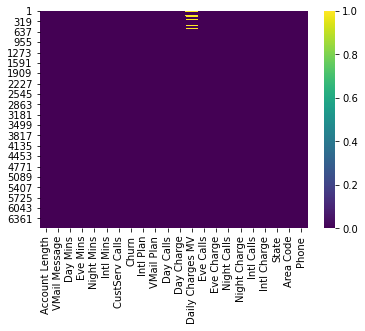

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

we have 50 missing values in 'Daily charges MV'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


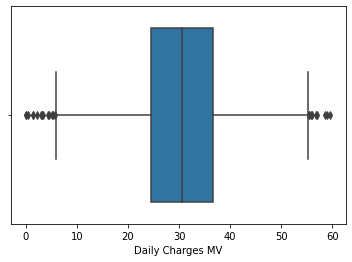

In [ ]:
sns.boxplot(df['Daily Charges MV'])

as we observe there are outliers in 'Daily Charges MV' , we can't rely on mean value.  we use median to replace the missing values . 

In [ ]:
median_val = df['Daily Charges MV'].median()
df['Daily Charges MV']= df['Daily Charges MV'].fillna(median_val)

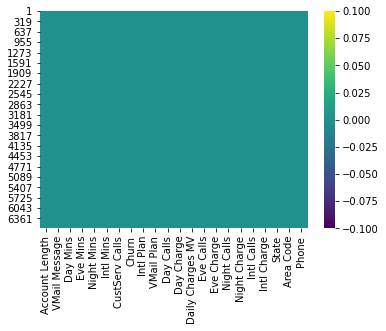

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

as we filled the missing values , checking missing value imputation accuracy

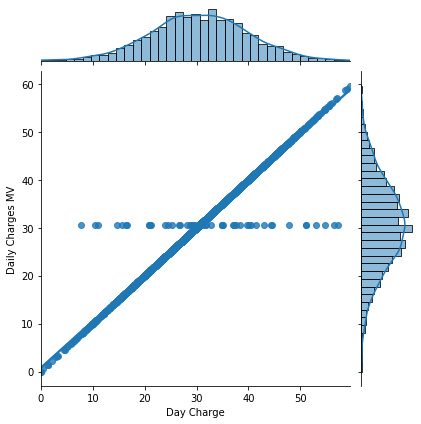

In [ ]:
sns.jointplot(x='Day Charge',y = 'Daily Charges MV',data=df,kind='reg')

it seems better, looking like good correlation

In our dataset , churn , Intl plan , VMail plan are filled with only 0 and 1 and the datatype is float64. 

so changing the datatypes into category

In [ ]:
df['Churn'] = df['Churn'].astype('category')
df['Intl Plan'] = df['Intl Plan'].astype('category')
df['VMail Plan'] = df['VMail Plan'].astype('category')

**dropping unwanted column:**

In [ ]:
df.corr()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Account Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.008347,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMail Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,0.001987,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.986681,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,0.006556,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,0.004402,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,-0.013933,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,-0.011189,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Day Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.008236,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646
Day Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.986680,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.008264
Daily Charges MV,0.008347,0.001987,0.986681,0.006556,0.004402,-0.013933,-0.011189,0.008236,0.986680,1.000000,0.014114,0.006543,0.021397,0.004380,0.006897,-0.013887,-0.005376


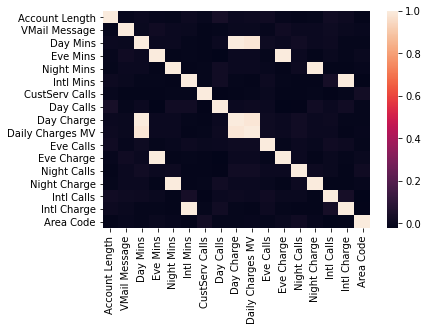

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.groupby('Churn').mean()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Churn,,,,,,,,,,,,,,,,,
0.0,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,29.776007,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
1.0,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,34.999545,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


in this both 'Day charge ' and 'Daily charge MV ' are like mirror columns . 

we remove 'Daily charge MV ' cause we filled some values with median  so better to use ' Day charge' 

In [ ]:
df.drop(['Daily Charges MV'],axis=1,inplace=True)

In [ ]:
#removing unwanted column
df.drop(['Area Code','Phone','State'],axis=1,inplace=True)

and also

Night Mins , Night Charge 0.999999

Eve Charge , Eve Mins 1.000000

Day Charge , Day Mins 1.000000

Intl Charge , Intl Mins 0.999993

are multicollinear variables so we only use one of them 

In [ ]:
df.drop(['Night Mins','Intl Mins','Eve Mins','Day Mins'],axis=1,inplace=True)

In [ ]:
df.head()

,Account Length,VMail Message,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
1,128.0,25.0,1.0,0.0,0.0,1.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70
3,107.0,26.0,1.0,0.0,0.0,1.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70
5,137.0,0.0,0.0,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29
7,84.0,0.0,2.0,0.0,1.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78
9,75.0,0.0,3.0,0.0,1.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73


**Data visualization:**

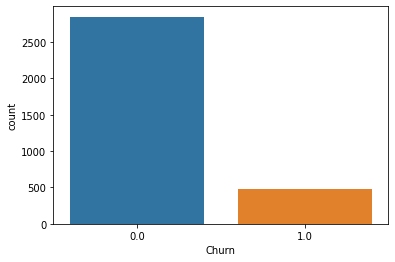

In [ ]:
sns.countplot(x='Churn',data=df)

In [ ]:
df.Churn.value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

based on the plot , 'Churn' class is imbalanced

only 14.5% belongs to churned class

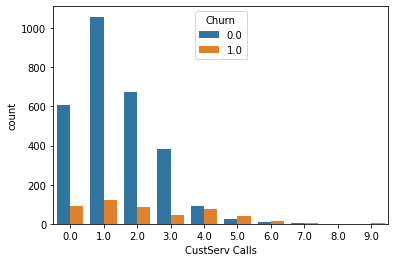

In [ ]:
sns.countplot(x='CustServ Calls',hue = 'Churn',data=df )

from the above plot , we may consider that customers are more likely to churn when customer calls increases

Text(0.5, 0, 'DAY CHARGE')

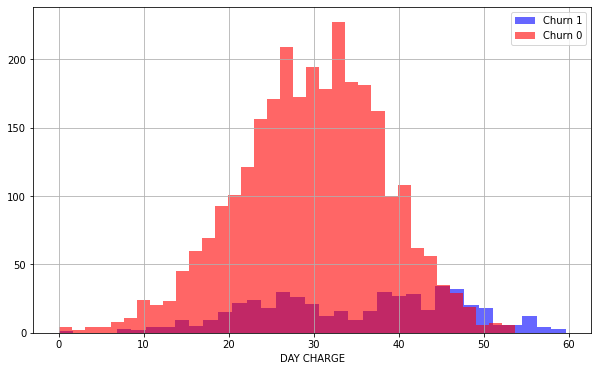

In [ ]:
plt.figure(figsize=(10,6))
df[df['Churn']==1]['Day Charge'].hist(bins=35,color = 'blue',label = 'Churn 1',alpha = 0.6)
df[df['Churn']==0]['Day Charge'].hist(bins = 35,color = 'red',label = 'Churn 0',alpha = 0.6)
plt.legend()
plt.xlabel('DAY CHARGE')

from the above plot , we may consider that customers with high daily charge more likely to churn

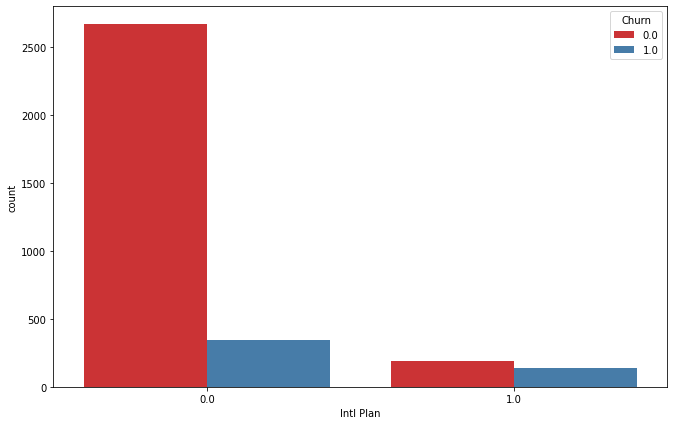

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x ='Intl Plan',hue='Churn',data = df,palette='Set1')

the customers with initial plan are more likely to churn than 

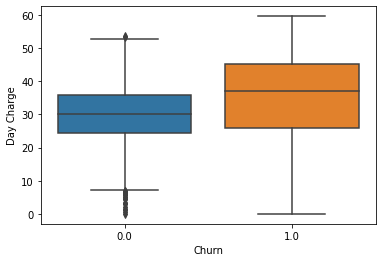

In [ ]:
sns.boxplot(x="Churn",y="Day Charge",data=df)

people are more likely to churn when 'Day charge' is higher

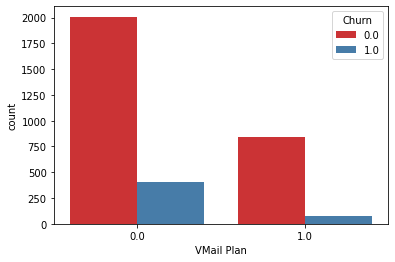

In [ ]:
sns.countplot(x ='VMail Plan',hue='Churn',data = df,palette='Set1')

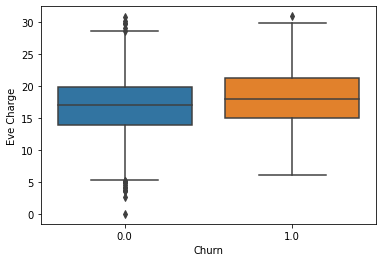

In [ ]:
sns.boxplot(x="Churn",y="Eve Charge",data=df)

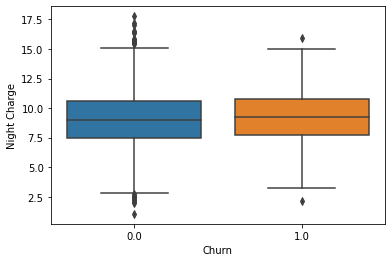

In [ ]:
sns.boxplot(x="Churn",y="Night Charge",data=df)

so most of the people who are churned are the one who were gwtting the heavy bill

**managing Outliers:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


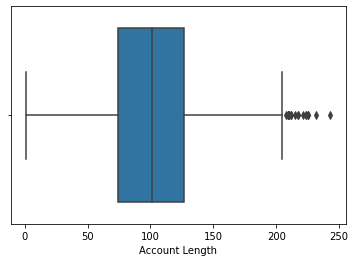

In [ ]:
sns.boxplot(df['Account Length'])

we have outliers in it,we will clip the otliers

In [ ]:
df['Account Length'].clip(upper = 200,inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


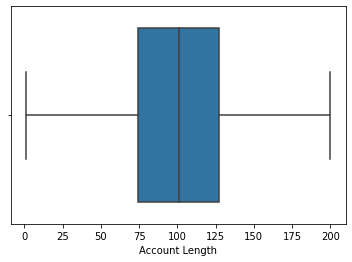

In [ ]:
#after clipping 
sns.boxplot(df['Account Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


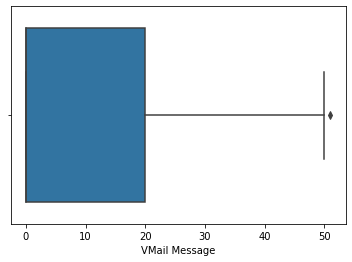

In [ ]:
sns.boxplot(df['VMail Message'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


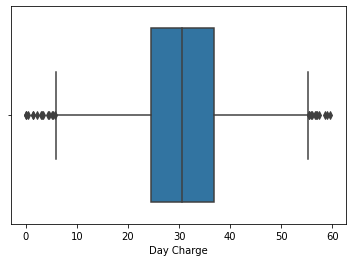

In [ ]:
sns.boxplot(df['Day Charge'])

In [ ]:
print(df['Day Charge'].quantile(0.99))
print(df['Day Charge'].quantile(0.01))

51.876799999999996
8.8132


In [ ]:
df['Day Charge'].clip(lower=8.813,upper=51.88,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


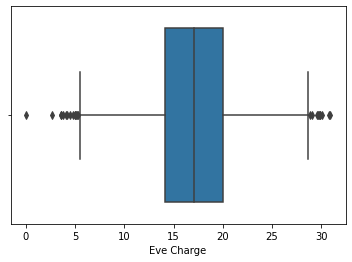

In [ ]:
sns.boxplot(df['Eve Charge'])

In [ ]:
print(df['Eve Charge'].quantile(0.99))
print(df['Eve Charge'].quantile(0.01))

27.113599999999998
6.7592


In [ ]:
df['Eve Charge'].clip(lower=6.76,upper=27.11,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


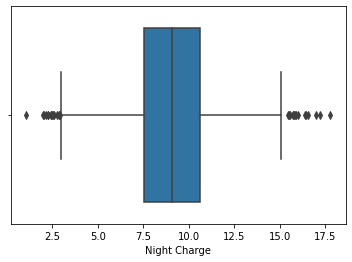

In [ ]:
sns.boxplot(df['Night Charge'])

In [ ]:
print(df['Night Charge'].quantile(0.99))
print(df['Night Charge'].quantile(0.01))

14.283999999999992
3.5764


In [ ]:
df['Night Charge'].clip(lower=6.76,upper=27.11,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


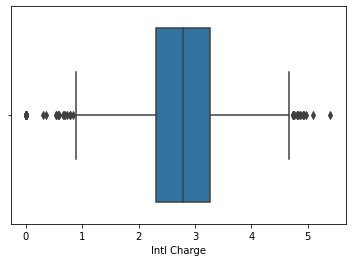

In [ ]:
sns.boxplot(df['Intl Charge'])

In [ ]:
print(df['Intl Charge'].quantile(0.99))
print(df['Intl Charge'].quantile(0.01))

4.5003999999999955
0.8996


In [ ]:
df['Intl Charge'].clip(lower=0.9,upper=4.5,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


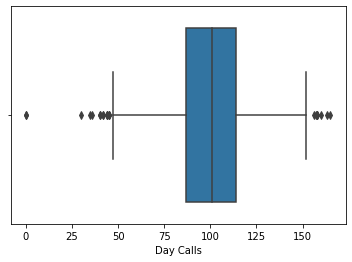

In [ ]:
sns.boxplot(df['Day Calls'])

In [ ]:
print(df['Day Calls'].quantile(0.99))
print(df['Day Calls'].quantile(0.01))

146.0
54.0


In [ ]:
df['Day Calls'].clip(lower=54,upper=146,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


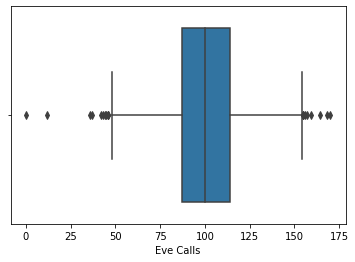

In [ ]:
sns.boxplot(df['Eve Calls'])

In [ ]:
print(df['Eve Calls'].quantile(0.99))
print(df['Eve Calls'].quantile(0.01))

147.0
53.0


In [ ]:
df['Eve Calls'].clip(lower=53,upper=147,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


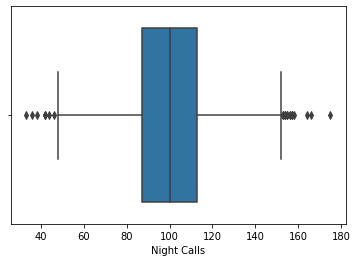

In [ ]:
sns.boxplot(df['Night Calls'])

In [ ]:
print(df['Night Calls'].quantile(0.99))
print(df['Night Calls'].quantile(0.01))

146.67999999999984
57.0


In [ ]:
df['Night Calls'].clip(lower=57,upper=146.7,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


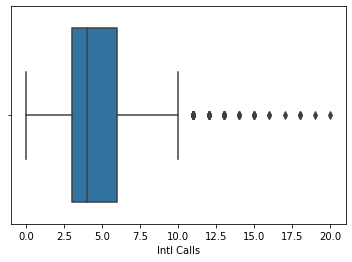

In [ ]:
sns.boxplot(df['Intl Calls'])

In [ ]:
print(df['Intl Calls'].quantile(0.99))
print(df['Intl Calls'].quantile(0.01))

13.0
1.0


In [ ]:
df['Intl Calls'].clip(lower=1,upper=13,inplace= True)

**Separating x and y:**

In [ ]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [ ]:
X.head()

,Account Length,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
1,128.0,25.0,1.0,0.0,1.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70
3,107.0,26.0,1.0,0.0,1.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70
5,137.0,0.0,0.0,0.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29
7,84.0,0.0,2.0,1.0,0.0,71.0,50.90,88.0,6.76,89.0,8.86,7.0,1.78
9,75.0,0.0,3.0,1.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73


**encoding:**

In [ ]:
X = pd.get_dummies(X,columns=['Intl Plan','VMail Plan','CustServ Calls'],drop_first=True)

In [ ]:
X.head()

,Account Length,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Intl Plan_1.0,VMail Plan_1.0,CustServ Calls_1.0,CustServ Calls_2.0,CustServ Calls_3.0,CustServ Calls_4.0,CustServ Calls_5.0,CustServ Calls_6.0,CustServ Calls_7.0,CustServ Calls_8.0,CustServ Calls_9.0
1,128.0,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,0,1,1,0,0,0,0,0,0,0,0
3,107.0,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,0,1,1,0,0,0,0,0,0,0,0
5,137.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0,0,0,0,0,0,0,0,0,0,0
7,84.0,0.0,71.0,50.90,88.0,6.76,89.0,8.86,7.0,1.78,1,0,0,1,0,0,0,0,0,0,0
9,75.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,1,0,0,0,1,0,0,0,0,0,0


**separating train and test sets:**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size = 0.30 ,random_state = 1)

**Scalling:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

**model building:**

**Logistic regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logpred = lr.predict(x_test)

In [ ]:
#Evaluation:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       855
         1.0       0.39      0.15      0.22       145

    accuracy                           0.84      1000
   macro avg       0.63      0.56      0.56      1000
weighted avg       0.80      0.84      0.81      1000



In [ ]:
logacc = accuracy_score(y_test,logpred)
logacc

0.842

**Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtpred = dt.predict(x_test)

In [ ]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       855
         1.0       0.66      0.79      0.72       145

    accuracy                           0.91      1000
   macro avg       0.81      0.86      0.83      1000
weighted avg       0.92      0.91      0.91      1000



In [ ]:
dtacc = accuracy_score(y_test,dtpred)
dtacc

0.91

**Random forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=500)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfpred = rf.predict(x_test)

In [ ]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       855
         1.0       0.88      0.63      0.74       145

    accuracy                           0.94      1000
   macro avg       0.91      0.81      0.85      1000
weighted avg       0.93      0.94      0.93      1000



In [ ]:
rfacc = accuracy_score(y_test,rfpred)
rfacc

0.935

**XG boost:**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgbpred = xgb.predict(x_test)

In [ ]:
print(classification_report(y_test,xgbpred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       855
         1.0       0.91      0.66      0.76       145

    accuracy                           0.94      1000
   macro avg       0.93      0.82      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
xgbacc = accuracy_score(y_test,xgbpred)


In [ ]:
xgbacc

0.941

**printing all accuracies:**

In [ ]:
print('logistic regression: ',logacc)
print('decision tree: ',dtacc)
print('random forest: ',rfacc)
print('XG_Boost: ',xgbacc)

logistic regression:  0.842
decision tree:  0.91
random forest:  0.935
XG_Boost:  0.941


Among all the classifiers we applied, we got high accuracy with  XGBclassifier 

But we can't say it's best . because we used a single test set , which may be favourable to XGBoosting model. to check this we  compute other accuracies on other test sets . to do that we use k-fold cross validation.  

**k-fold cross validation on XGBooosting model:**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
kxgaccs = cross_val_score(estimator=xgb,X=x_train,y=y_train,cv=10)

In [ ]:
print("accuracy: {:.2f} %".format(kxgaccs.mean()*100))

accuracy: 94.25 %


we got final accuraacy of 94.25% on this model